In [7]:
# Import relevant libaries

import pandas as pd
import os
from pathlib import Path
import openpyxl  # Ensure openpyxl is installed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Import cleaned and standardized datasets for both conditions

In [2]:
# Load the df_chat_surveys.csv file
data_dir = Path('chat_exports')
df_chat_surveys = pd.read_csv(data_dir / 'df_chat_surveys_standardized.csv', sep=',')
print(f"df_chat_surveys shape: {df_chat_surveys.shape}")
# Preview the dataset
df_chat_surveys.head()

df_chat_surveys shape: (45, 74)


,participant_id,created_at,ip_address,device_type,background_submitted_at,q1_age_group,q2_gender,q3_education,q4_employment,q5_nationality,...,q29_tool_easier_task,q30_tool_useful,q31_tool_too_much_info,q32_tool_difficult_focus,q33_results_accurate,q34_results_trust,q35_results_complete,q36_results_relevant,q37_results_useful,q40_purchase_likelihood
0,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:22:11.281835+00,"84.17.45.206,84.17.45.206, 99.82.172.145",desktop,2025-11-20 16:23:00.392222+00:00,18-24,Female,High school or below,Student,Indo,...,6,5,7,6,7,5,5,6,7,2
1,151939c4-8aae-490b-92eb-c7d353a4a95c,2025-11-18 18:15:57.927115+00,"193.197.8.143,193.197.8.143, 99.82.163.77",desktop,2025-11-18 18:17:10.869409+00:00,35-44,Male,Master's degree,Employed,Iranian,...,6,7,6,4,4,5,5,5,5,6
2,e2f70344-8588-468c-9dc2-8c2993f5b6c9,2025-11-15 23:28:20.372283+00,"178.84.99.93,178.84.99.93, 3.2.59.182",desktop,2025-11-15 23:29:47.088239+00:00,18-24,Female,Bachelor's degree,Student,Nederland,...,5,5,6,5,3,4,4,6,3,5
3,88584cfe-a550-4209-a1f3-be628bb2647b,2025-11-13 16:29:27.470605+00,"89.92.129.28,89.92.129.28, 99.82.161.171",desktop,2025-11-13 16:30:20.934922+00:00,35-44,Male,Master's degree,Self-employed,French,...,6,6,6,4,5,5,5,5,5,4
4,25e47297-047a-4582-bc17-c13f5b2ef07b,2025-11-13 12:54:47.011689+00,"153.92.90.3,153.92.90.3, 99.82.163.72",mobile,2025-11-13 12:55:37.488309+00:00,18-24,Female,Bachelor's degree,Student,Georgian,...,5,5,4,5,7,7,7,7,7,4


In [3]:
# Load the df_gg_surveys.csv file
data_dir = Path('google_exports')
df_gg_surveys = pd.read_csv(data_dir / 'df_gg_surveys_standardised.csv', sep=',')
print(f"df_gg_surveys shape: {df_gg_surveys.shape}")
# Preview the dataset
df_gg_surveys.head()

df_gg_surveys shape: (52, 69)


,participant_id,q1_age_group,q2_gender,q3_education,q4_employment_status,q5_nationality,q5_nationality_sd,q6_residence,q6_residence_sd,q7_chatbot_familiarity,...,q42_comments,background_submitted_at,instruction_submitted_at,postsurvey_submitted_at,ip_address,device_type,results_submitted_at,session_start_time,session_end_time,session_duration_ms
0,09e6255b-ed66-4eea-a314-104a08130ac0,35-44,Female,Doctorate / PhD,Employed,UK,UK,UK,UK,7,...,"I liked the more minimal interface, and I like...",2025-10-31 22:11:56.864775+00:00,2025-10-31 22:12:41.977243+00:00,2025-10-31 22:22:26.969691+00:00,129.67.117.187,desktop,2025-10-31 22:19:44.042285+00:00,2025-10-31 22:10:58.834+00,2025-10-31 22:18:19.43+00,440596.0
1,15ef74b6-a61a-474c-b855-696b20ce58fb,55 and above,Male,Master's degree,Employed,German,Germany,Germany,Germany,1,...,Maybe,2025-10-24 14:12:35.527412+00:00,2025-10-24 14:21:30.862457+00:00,2025-10-24 14:28:43.167002+00:00,213.146.69.174,desktop,2025-10-24 14:27:11.483904+00:00,2025-10-24 14:11:51.631+00,2025-10-24 14:24:48.07+00,776439.0
2,1f0df1be-a1ea-4080-90c3-230fe9e35174,18-24,Female,Bachelor's degree,Student,United States,USA,United States,USA,6,...,"Yes, it showed me relevant results for what I ...",2025-11-10 03:25:51.855943+00:00,2025-11-10 03:26:25.769685+00:00,2025-11-10 03:29:58.830293+00:00,108.2.105.241,desktop,2025-11-10 03:28:20.935272+00:00,2025-11-10 03:25:14.283+00,2025-11-10 03:26:06.698+00,52415.0
3,2afa9961-1844-49e8-80fc-444466532f46,25-34,Female,Master's degree,Employed,Russian,NaN,Russia,Russia,6,...,"Yes, the tool was transparent and easy to use,...",2025-10-24 17:08:04.105300+00:00,2025-10-24 17:10:42.739044+00:00,2025-10-24 17:15:27.907607+00:00,2a00:1370:8180:f390:10f5:bcf9:8f0:be3f,mobile,2025-10-24 17:12:41.450159+00:00,2025-10-24 17:06:39.799+00,2025-10-24 17:10:49.029+00,249230.0
4,2d8dd1db-9d38-49e0-bf03-5b4735523d27,18-24,Female,High school or below,Student,Swiss,Switzerland,Switzerland,Switzerland,7,...,"No, AI didn’t show the classical bar abovd",2025-10-29 09:54:21.050268+00:00,2025-10-29 09:54:41.702835+00:00,2025-10-29 10:01:23.058400+00:00,172.225.188.246,mobile,2025-10-29 09:58:09.817211+00:00,2025-10-29 09:52:50.793+00,2025-10-29 09:54:46.465+00,115672.0


## 2. Demographics Analysis

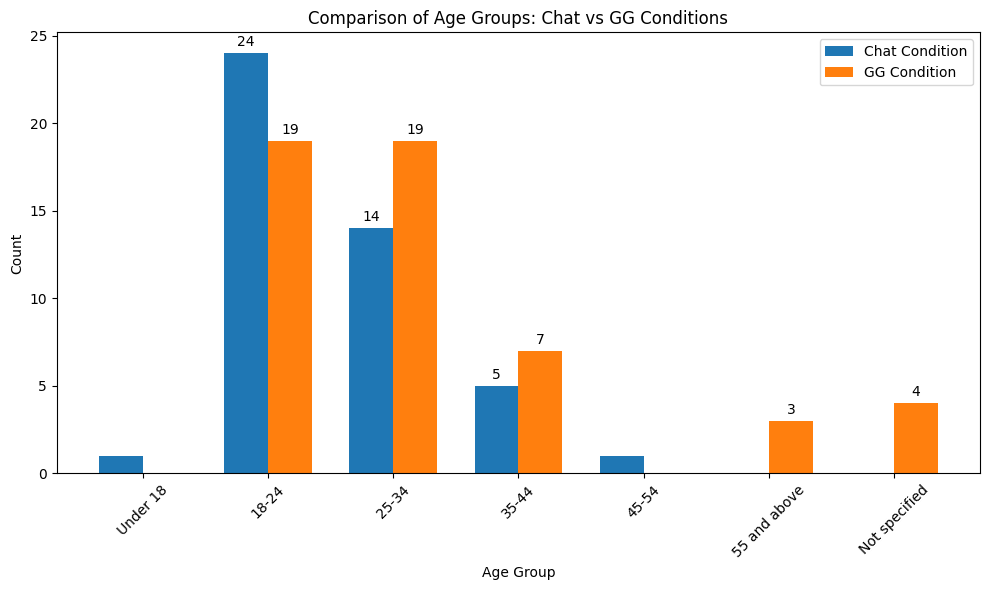

In [28]:
# Bar chart comparing q1_age_group for chat and gg conditions, with custom age group order and annotations
custom_age_order = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55 and above", "Not specified"]
df_chat_surveys['q1_age_group'] = df_chat_surveys['q1_age_group'].fillna('Not specified')
df_gg_surveys['q1_age_group'] = df_gg_surveys['q1_age_group'].fillna('Not specified')
chat_counts = df_chat_surveys['q1_age_group'].value_counts().reindex(custom_age_order, fill_value=0)
gg_counts = df_gg_surveys['q1_age_group'].value_counts().reindex(custom_age_order, fill_value=0)
bar_width = 0.35
x = range(len(custom_age_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_age_order, rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Comparison of Age Groups: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

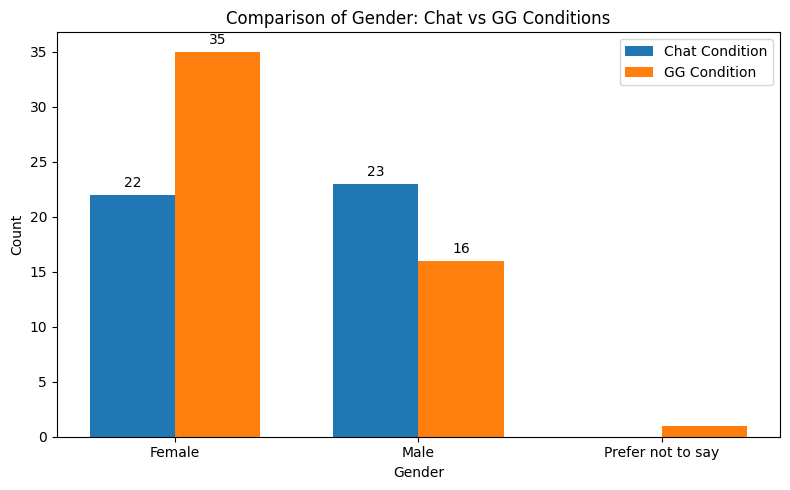

In [27]:
# Bar chart comparing q2_gender for chat and gg conditions, with annotations
df_chat_surveys['q2_gender'] = df_chat_surveys['q2_gender'].fillna('Not specified')
df_gg_surveys['q2_gender'] = df_gg_surveys['q2_gender'].fillna('Not specified')
chat_gender_counts = df_chat_surveys['q2_gender'].value_counts().sort_index()
gg_gender_counts = df_gg_surveys['q2_gender'].value_counts().sort_index()
genders = sorted(set(chat_gender_counts.index).union(set(gg_gender_counts.index)))
chat_gender_counts = chat_gender_counts.reindex(genders, fill_value=0)
gg_gender_counts = gg_gender_counts.reindex(genders, fill_value=0)
bar_width = 0.35
x = range(len(genders))
plt.figure(figsize=(8,5))
bars1 = plt.bar(x, chat_gender_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_gender_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], genders, rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Gender: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

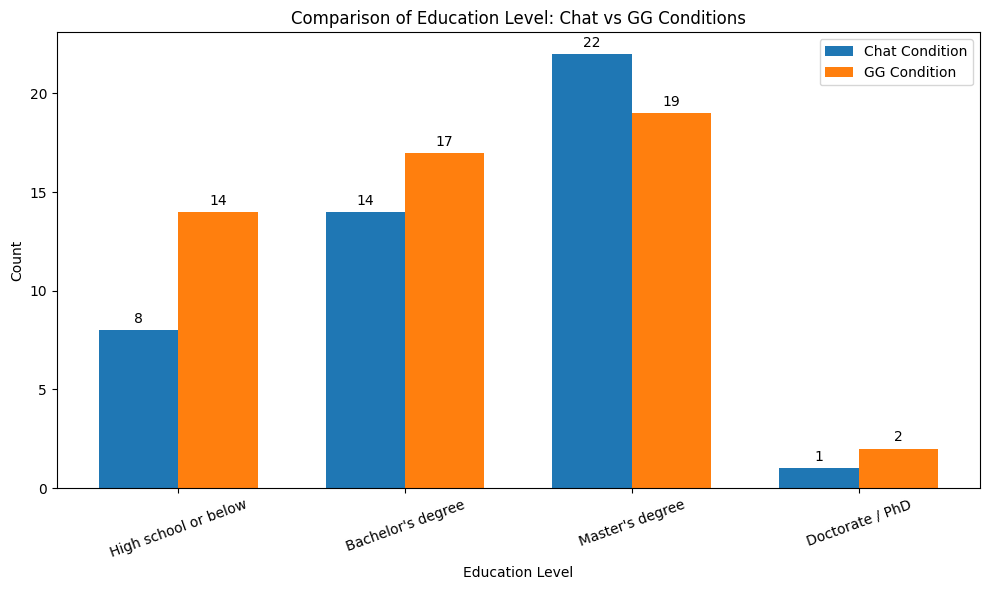

In [14]:
# Bar chart comparing q3_education for chat and gg conditions, with custom order and annotations
custom_edu_order = ["High school or below", "Bachelor's degree", "Master's degree", "Doctorate / PhD"]
df_chat_surveys['q3_education'] = df_chat_surveys['q3_education'].fillna('Not specified')
df_gg_surveys['q3_education'] = df_gg_surveys['q3_education'].fillna('Not specified')
chat_edu_counts = df_chat_surveys['q3_education'].value_counts().reindex(custom_edu_order, fill_value=0)
gg_edu_counts = df_gg_surveys['q3_education'].value_counts().reindex(custom_edu_order, fill_value=0)
bar_width = 0.35
x = range(len(custom_edu_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_edu_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_edu_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_edu_order, rotation=20)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Comparison of Education Level: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

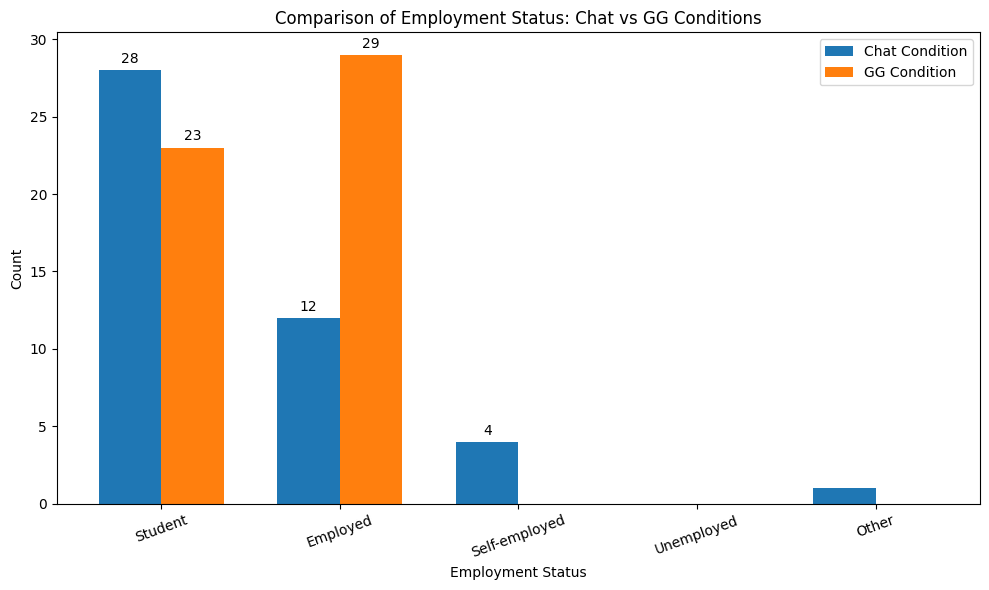

In [26]:
# Bar chart comparing q4_employment for chat and gg conditions, with custom order and annotations
custom_emp_order = ["Student", "Employed", "Self-employed", "Unemployed", "Other"]
# Rename q4_employment_status to q4_employment in gg dataset if needed
if 'q4_employment_status' in df_gg_surveys.columns:
    df_gg_surveys = df_gg_surveys.rename(columns={'q4_employment_status': 'q4_employment'})
df_chat_surveys['q4_employment'] = df_chat_surveys['q4_employment'].fillna('Not specified')
df_gg_surveys['q4_employment'] = df_gg_surveys['q4_employment'].fillna('Not specified')
chat_emp_counts = df_chat_surveys['q4_employment'].value_counts().reindex(custom_emp_order, fill_value=0)
gg_emp_counts = df_gg_surveys['q4_employment'].value_counts().reindex(custom_emp_order, fill_value=0)
bar_width = 0.35
x = range(len(custom_emp_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_emp_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_emp_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_emp_order, rotation=20)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Comparison of Employment Status: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

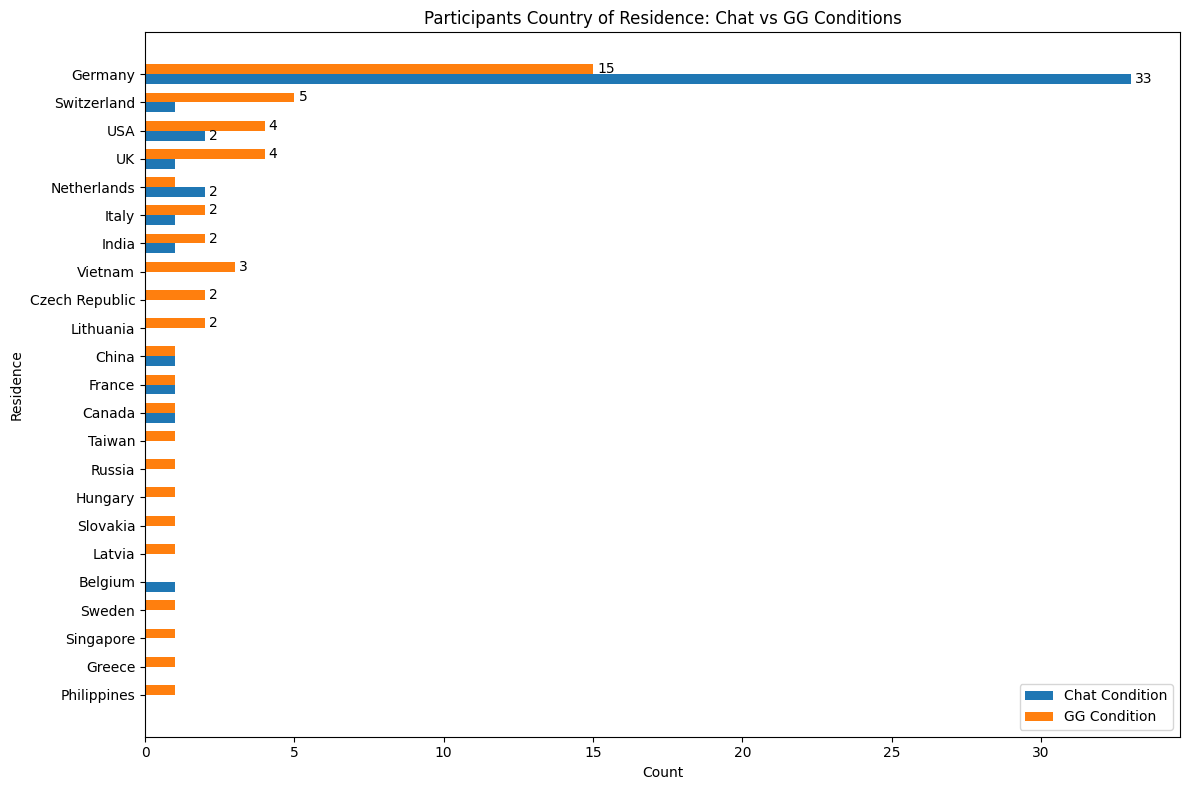

In [20]:
# Clean leading/trailing spaces in chat q6_residence_sd before plotting
df_chat_surveys['q6_residence_sd'] = df_chat_surveys['q6_residence_sd'].str.strip()

# Horizontal bar chart comparing q6_residence_sd for chat and gg conditions, ascending order by count, annotate only if count >= 2
df_chat_surveys['q6_residence_sd'] = df_chat_surveys['q6_residence_sd'].fillna('Not specified')
df_gg_surveys['q6_residence_sd'] = df_gg_surveys['q6_residence_sd'].fillna('Not specified')
chat_res_counts = df_chat_surveys['q6_residence_sd'].value_counts()
gg_res_counts = df_gg_surveys['q6_residence_sd'].value_counts()
all_residences = set(chat_res_counts.index).union(set(gg_res_counts.index))
# Get total counts for sorting
total_counts = {res: chat_res_counts.get(res,0) + gg_res_counts.get(res,0) for res in all_residences}
sorted_residences = sorted(all_residences, key=lambda x: total_counts[x])
chat_res_counts = chat_res_counts.reindex(sorted_residences, fill_value=0)
gg_res_counts = gg_res_counts.reindex(sorted_residences, fill_value=0)
bar_height = 0.35
y = range(len(sorted_residences))
plt.figure(figsize=(12,8))
bars1 = plt.barh(y, chat_res_counts, height=bar_height, label='Chat Condition')
bars2 = plt.barh([i + bar_height for i in y], gg_res_counts, height=bar_height, label='GG Condition')
plt.yticks([i + bar_height/2 for i in y], sorted_residences)
plt.ylabel('Residence')
plt.xlabel('Count')
plt.title('Participants Country of Residence: Chat vs GG Conditions')
plt.legend()
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

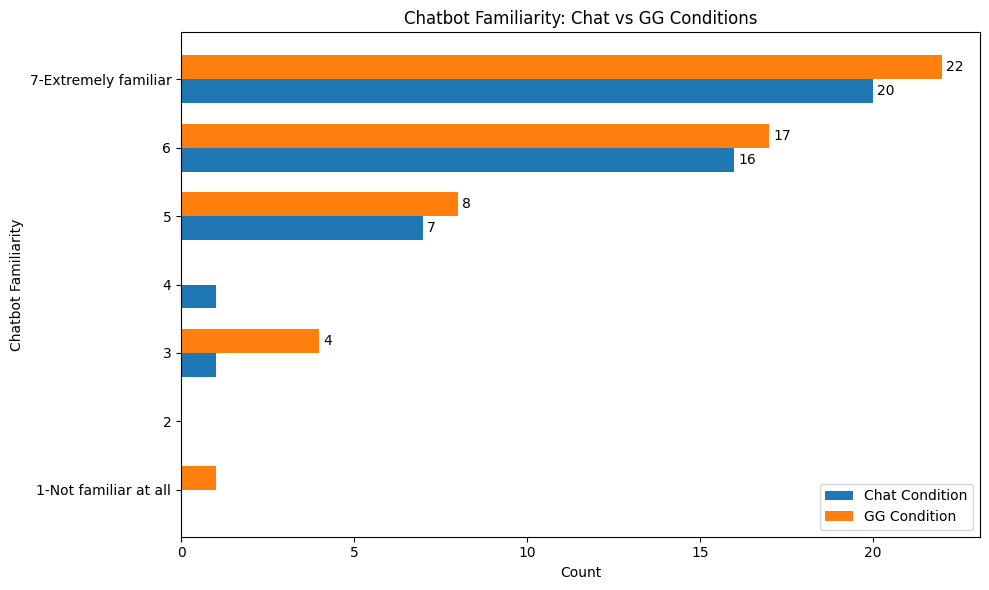

In [25]:
# Horizontal bar chart for chatbot familiarity, annotate only if count > 1
def map_familiarity(val):
    if pd.isna(val):
        return 'Not specified'
    val_str = str(val).strip()
    mapping = {
        '1': '1-Not familiar at all',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7-Extremely familiar'
    }
    return mapping.get(val_str, val_str)
df_chat_surveys['q7_chatbot_familiarity_mapped'] = df_chat_surveys['q7_chatbot_familiarity'].apply(map_familiarity)
df_gg_surveys['q7_chatbot_familiarity_mapped'] = df_gg_surveys['q7_chatbot_familiarity'].apply(map_familiarity)
custom_fam_order = ["1-Not familiar at all", "2", "3", "4", "5", "6", "7-Extremely familiar"]
chat_fam_counts = df_chat_surveys['q7_chatbot_familiarity_mapped'].value_counts().reindex(custom_fam_order, fill_value=0)
gg_fam_counts = df_gg_surveys['q7_chatbot_familiarity_mapped'].value_counts().reindex(custom_fam_order, fill_value=0)
bar_height = 0.35
y = range(len(custom_fam_order))
plt.figure(figsize=(10,6))
bars1 = plt.barh(y, chat_fam_counts, height=bar_height, label='Chat Condition')
bars2 = plt.barh([i + bar_height for i in y], gg_fam_counts, height=bar_height, label='GG Condition')
plt.yticks([i + bar_height/2 for i in y], custom_fam_order)
plt.ylabel('Chatbot Familiarity')
plt.xlabel('Count')
plt.title('Chatbot Familiarity: Chat vs GG Conditions')
plt.legend()
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    if width > 1:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    if width > 1:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()